# Notebook to process data to see census comparison for each adjustments

In [15]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

from PopSynthesis.Methods.connect_HH_PP.paras_dir import output_dir, data_dir

In [10]:
font = {'weight' : 'bold',
        'size'   : 18}
plt.rc('font', **font)

geo_lev = "POA"

In [11]:
# Import adjustments (5 of them, but I think will show 4 only)

hh_ad1 = pd.read_csv(os.path.join(output_dir, "adjust", "final", "saving_hh_hhsize.csv")) # hhsize
hh_ad2 = pd.read_csv(os.path.join(output_dir, "adjust", "final", "saving_hh_totalvehs.csv")) # totavehs
hh_ad3 = pd.read_csv(os.path.join(output_dir, "adjust", "final", "saving_hh_hhinc.csv")) # hhinc
hh_ad4 = pd.read_csv(os.path.join(output_dir, "adjust", "final", "saving_hh_dwelltype.csv")) # dwelltype
hh_ad5 = pd.read_csv(os.path.join(output_dir, "adjust", "final", "saving_hh_owndwell.csv")) # owndwell

C:\Users\dlaa0001\AppData\Local\Temp\ipykernel_13732\3962234960.py:3: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  hh_ad1 = pd.read_csv(os.path.join(output_dir, "adjust", "final", "saving_hh_hhsize.csv")) # hhsize
C:\Users\dlaa0001\AppData\Local\Temp\ipykernel_13732\3962234960.py:4: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  hh_ad2 = pd.read_csv(os.path.join(output_dir, "adjust", "final", "saving_hh_totalvehs.csv")) # totavehs
C:\Users\dlaa0001\AppData\Local\Temp\ipykernel_13732\3962234960.py:5: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  hh_ad3 = pd.read_csv(os.path.join(output_dir, "adjust", "final", "saving_hh_hhinc.csv")) # hhinc
C:\Users\dlaa0001\AppData\Local\Temp\ipykernel_13732\3962234960.py:6: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  hh_ad4 = pd.

In [14]:
ls_hh_ordered = [hh_ad1, hh_ad2, hh_ad3, hh_ad4, hh_ad5]
ls_hh_ordered = [x.astype(str) for x in ls_hh_ordered]

In [16]:
marg_hh = pd.read_csv(os.path.join(data_dir,f"hh_marginals_ipu.csv"), header=[0,1])

hold = marg_hh.columns[marg_hh.columns.get_level_values(0)=="zone_id"]
marg_hh = marg_hh.set_index(hold[0])
marg_hh.index.name = geo_lev
marg_hh

sample_geog hhsize                                   \
     Unnamed: 1_level_1      1     2     3    4    5   6  7  8+   
POA                                                               
3000                  2  10393  8524  2026  656  118  27  4  58   
3002                  2   1035  1019   190  101   38   9  0  55   
3003                  2   1504  1591   476  223   40  11  7  55   
3004                  2   2566  2382   511  227   33   6  5  55   
3006                  2   5113  5033  1280  414   59  13  8  58   
...                 ...    ...   ...   ...  ...  ...  .. ..  ..   
3990                  2      6    20     8    4    3   0  0  55   
3991                  2     37    65    16   19   10   9  0  55   
3992                  2    134   201    72   60   24   9  0  55   
3995                  2   1663  1834   629  451  228  73  8  58   
3996                  2    806  1176   251  299  137  31  6  59   

             dwelltype  ...      hhinc totalvehs                        \
     Flat or Apartment  ... Nil income         0     1     2    3   4+   
POA                     ...                                              
3000             21545  ...       1898     14706  5436   853  412  399   
3002              1852  ...         42       465  1271   556   89   66   
3003              3165  ...        158      1396  1934   429   94   54   
3004              5742  ...        172      1207  3448   867  166   97   
3006             11764  ...        433      4740  5860  1040  192  146   
...                ...  ...        ...       ...   ...   ...  ...  ...   
3990                 0  ...          5        11    11    30   23   21   
3991                 0  ...          7        16    44    78   40   33   
3992                 0  ...          6        12   153   218   93   79   
3995                26  ...         87       370  1946  1704  582  342   
3996                20  ...         54        89  1049  1198  295  134   

            owndwell                                          
     Being Purchased Being Rented Fully Owned Something Else  
POA                                                           
3000            2452        16594        2290            470  
3002             435         1292         678             42  
3003             797         2548         463             99  
3004            1206         3210        1271             98  
3006            2132         8101        1534            211  
...              ...          ...         ...            ...  
3990              16            0          22             58  
3991              51           17          67             76  
3992             229           55         192             79  
3995            1326         1150        2316            152  
3996             687          493        1529             56  

[691 rows x 45 columns]

In [17]:
# Polynomial Regression
def r_squared(x, y, degree):
    results = {}

    coeffs = np.polyfit(x, y, degree)

     # Polynomial Coefficients
    results['polynomial'] = coeffs.tolist()

    # r-squared
    p = np.poly1d(coeffs)
    # fit values, and mean
    yhat = p(x)                         # or [p(z) for z in x]
    ybar = np.sum(y)/len(y)          # or sum(y)/len(y)
    ssreg = np.sum((yhat-ybar)**2)   # or sum([ (yihat - ybar)**2 for yihat in yhat])
    sstot = np.sum((y - ybar)**2)    # or sum([ (yi - ybar)**2 for yi in y])
    results['determination'] = ssreg / sstot

    return results

C:\Users\dlaa0001\AppData\Local\Temp\ipykernel_13732\3291737542.py:24: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure(figsize = (10, 5))


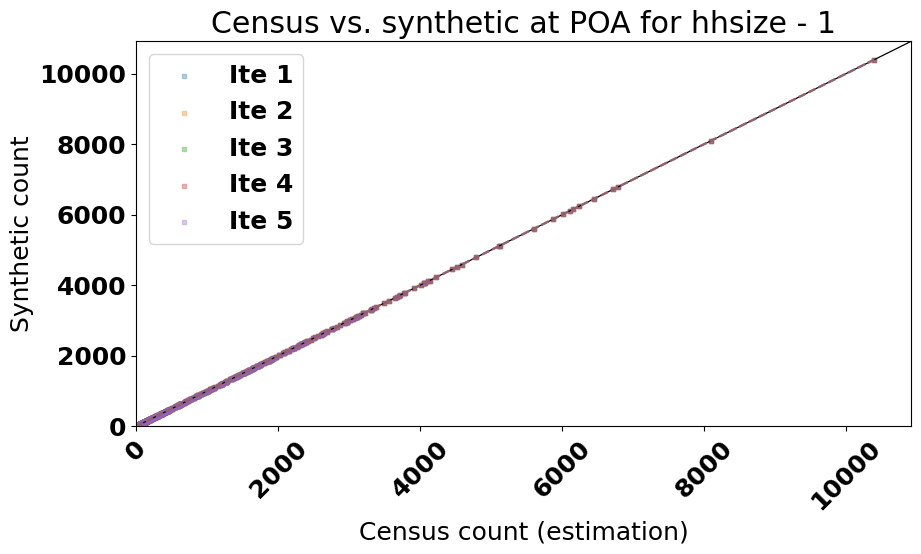

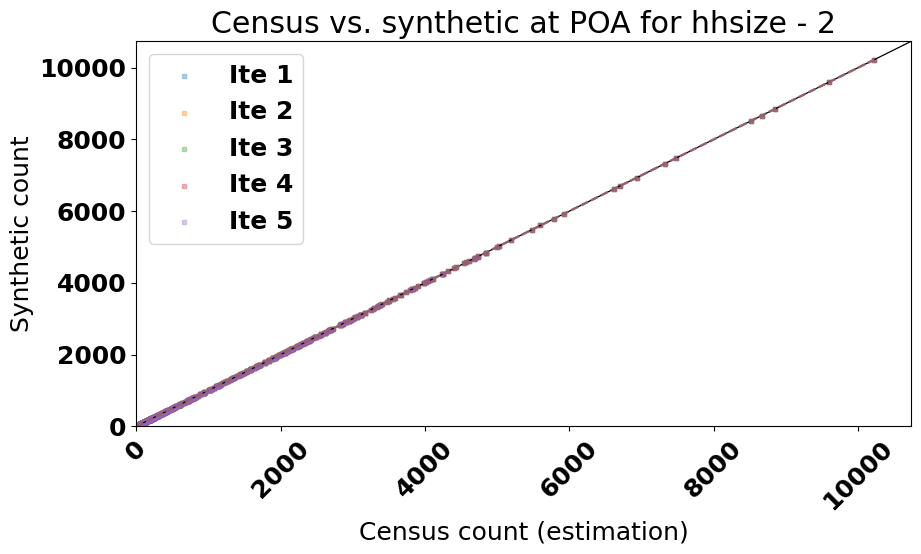

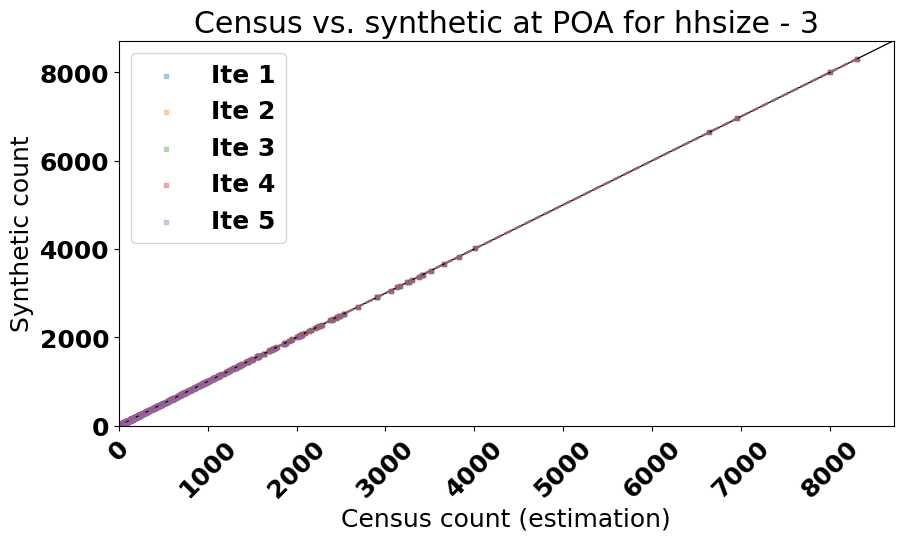

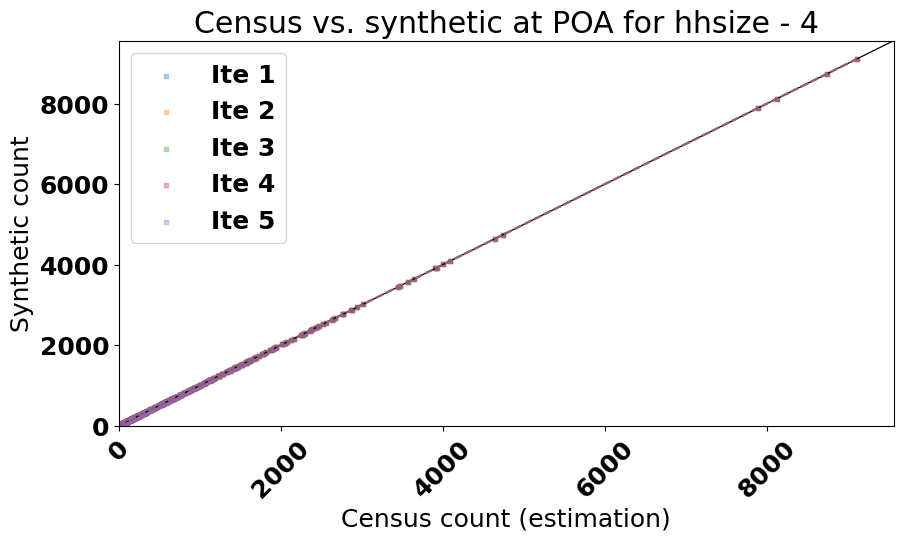

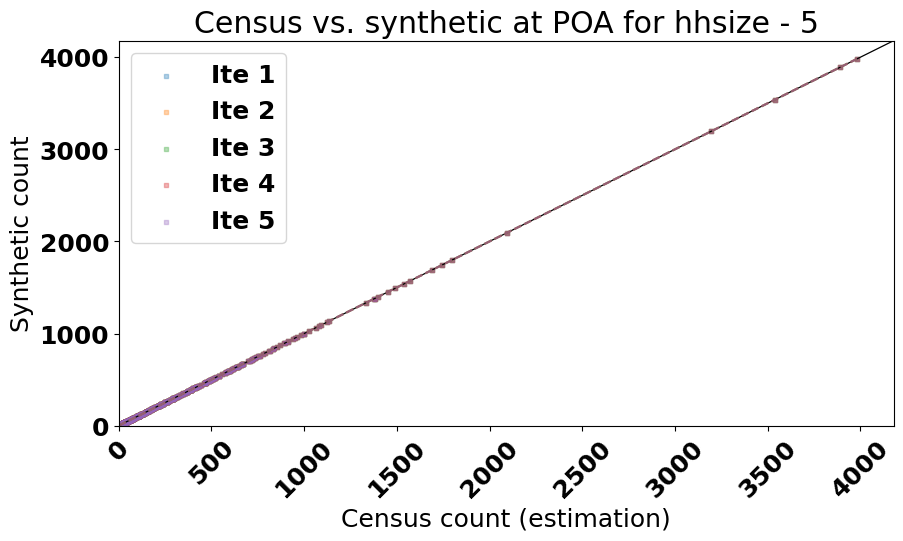

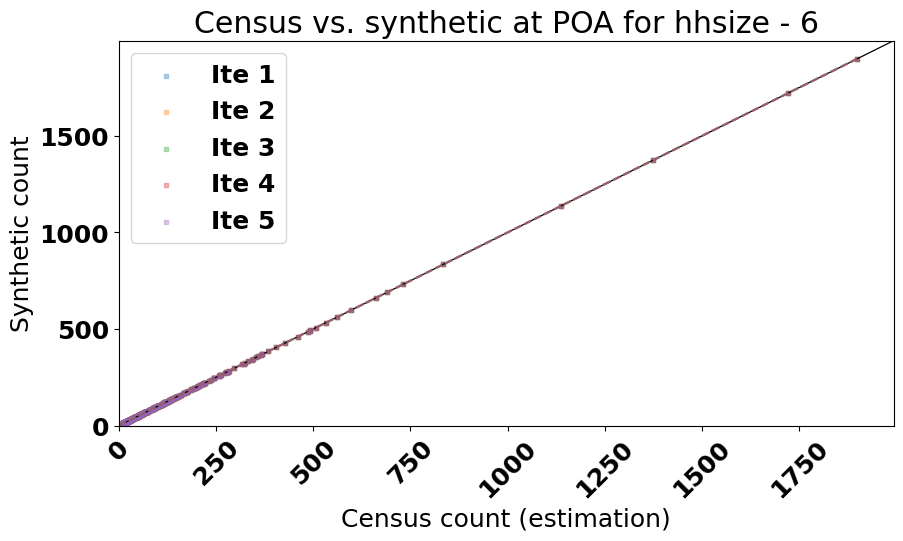

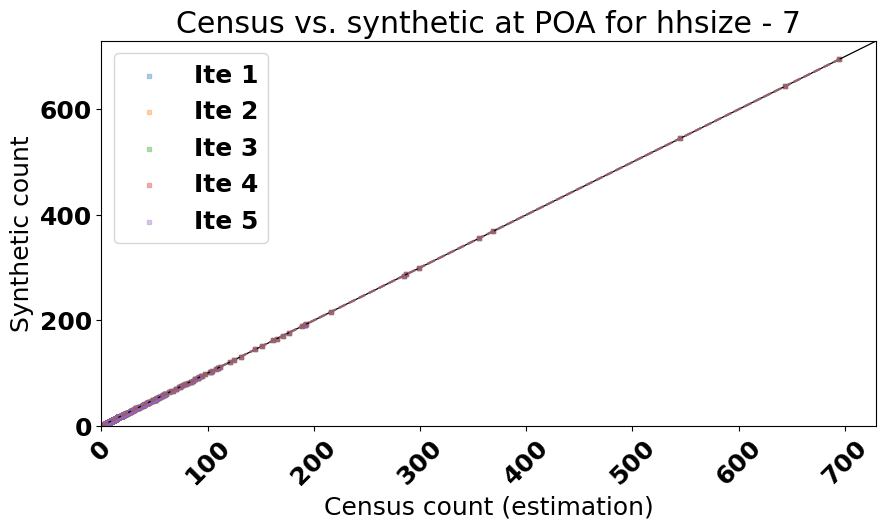

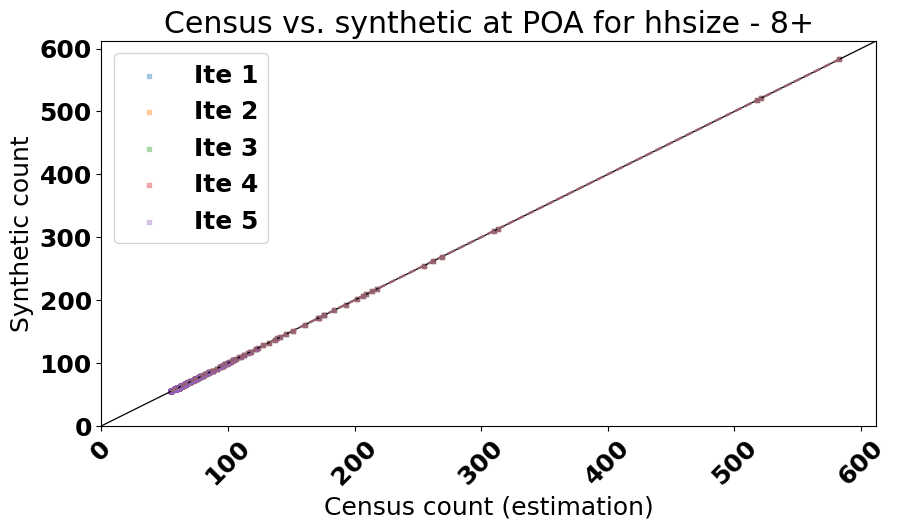

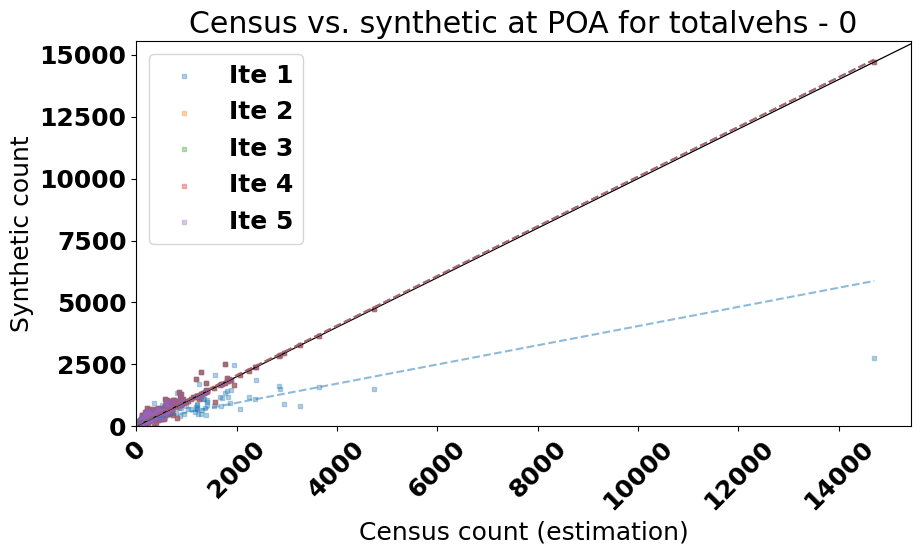

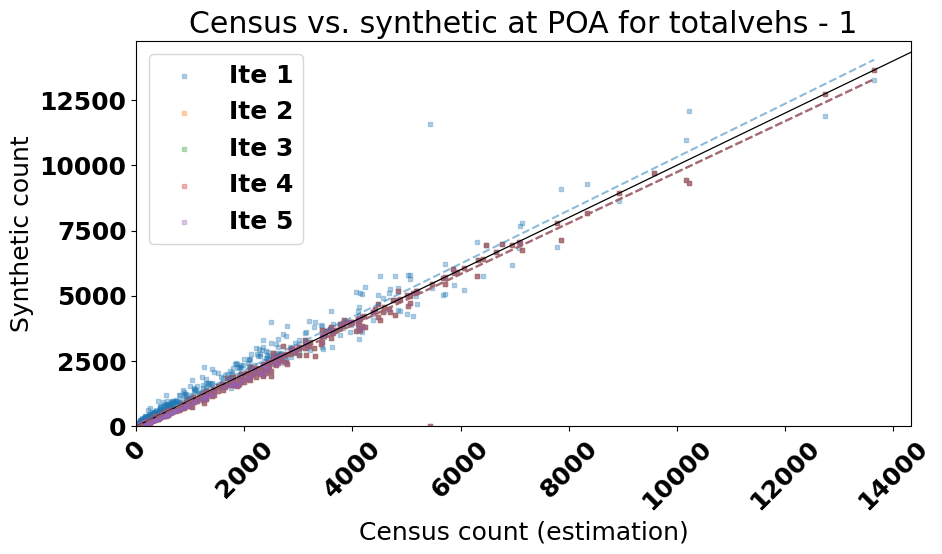

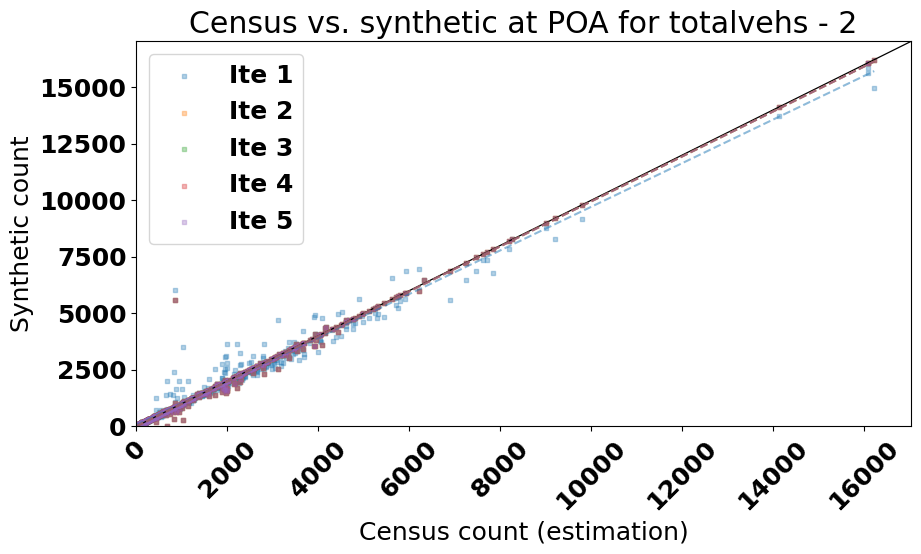

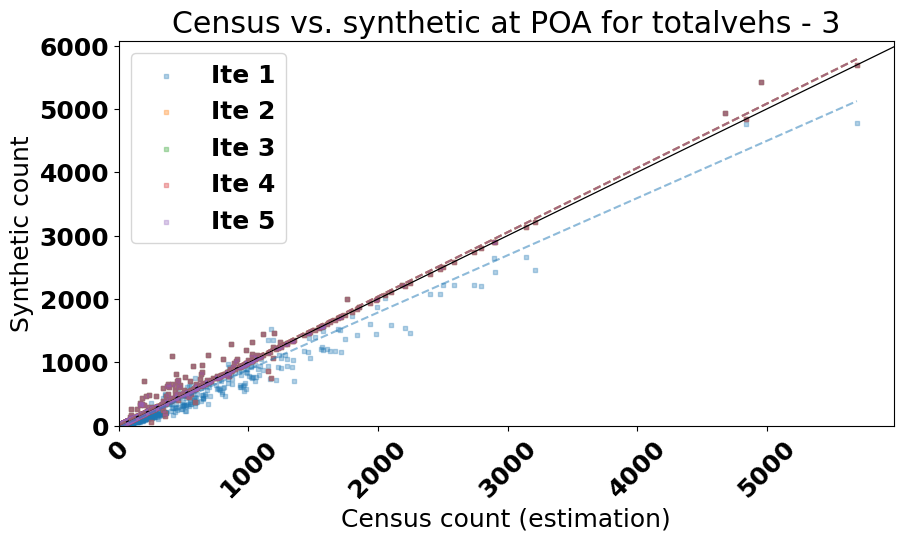

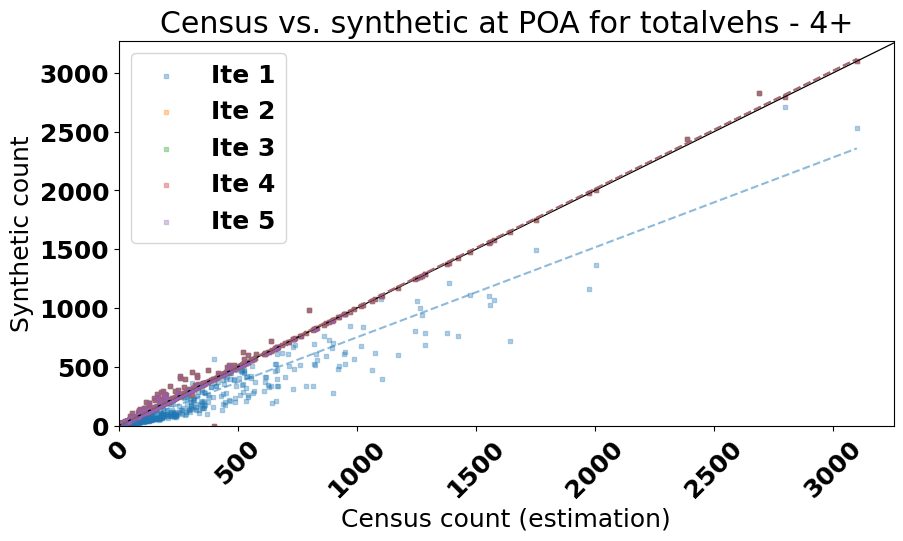

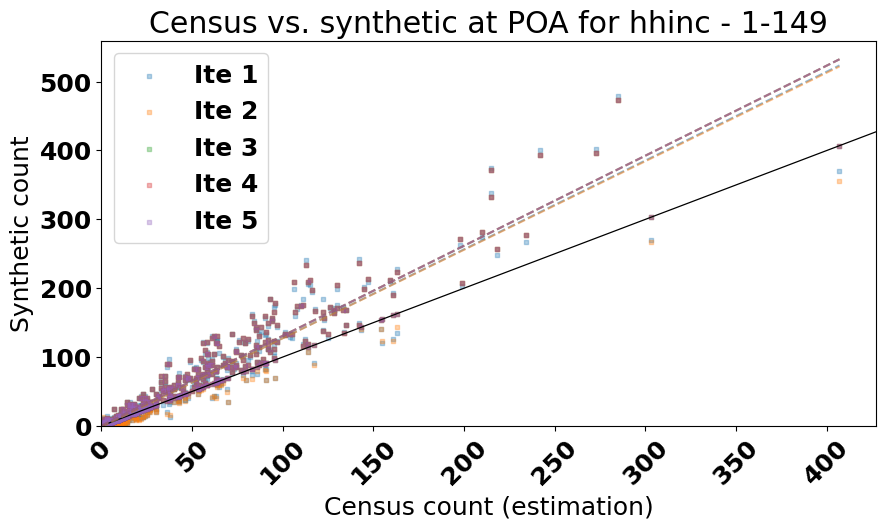

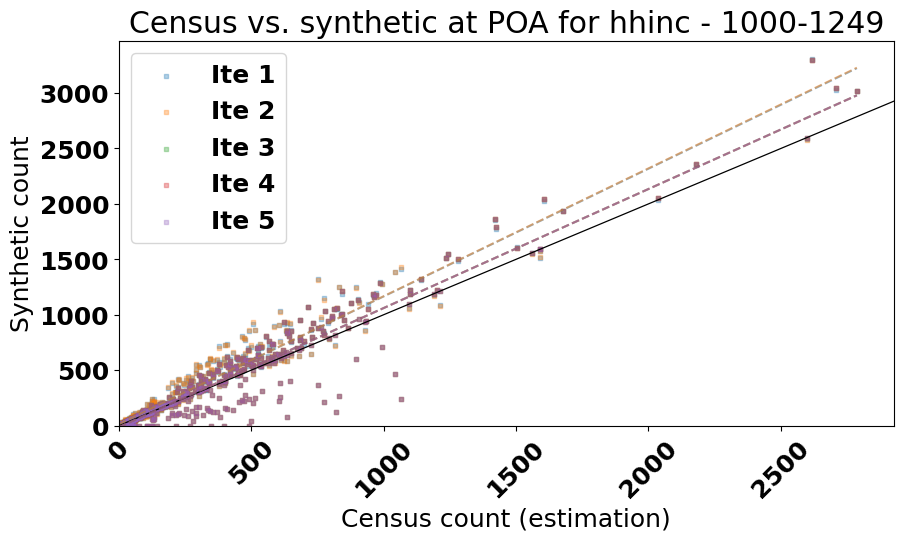

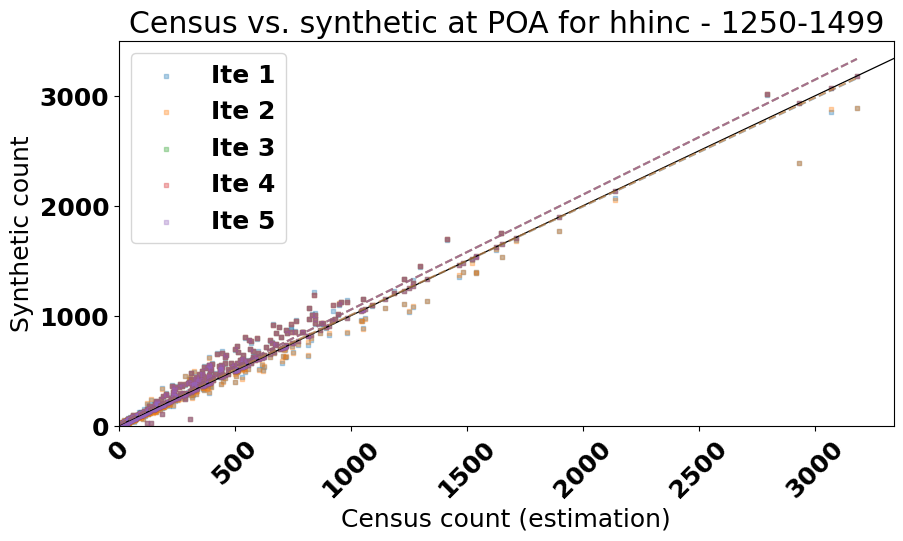

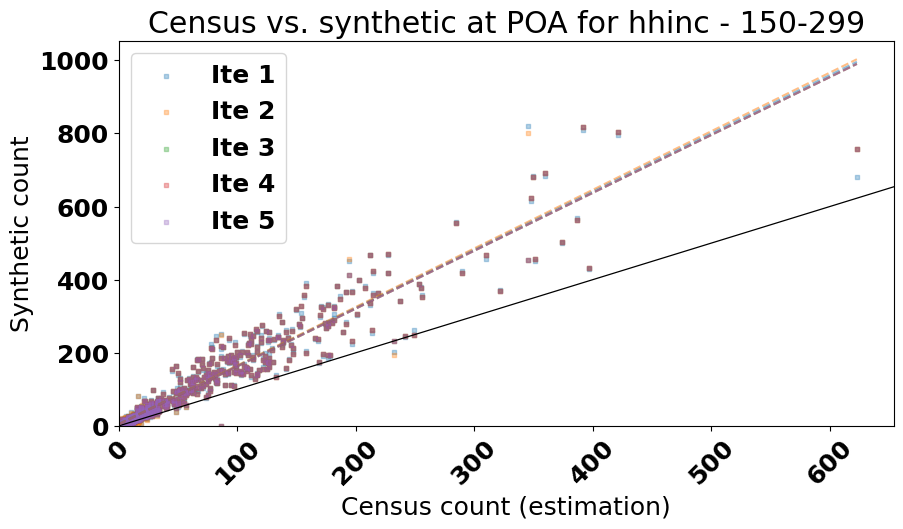

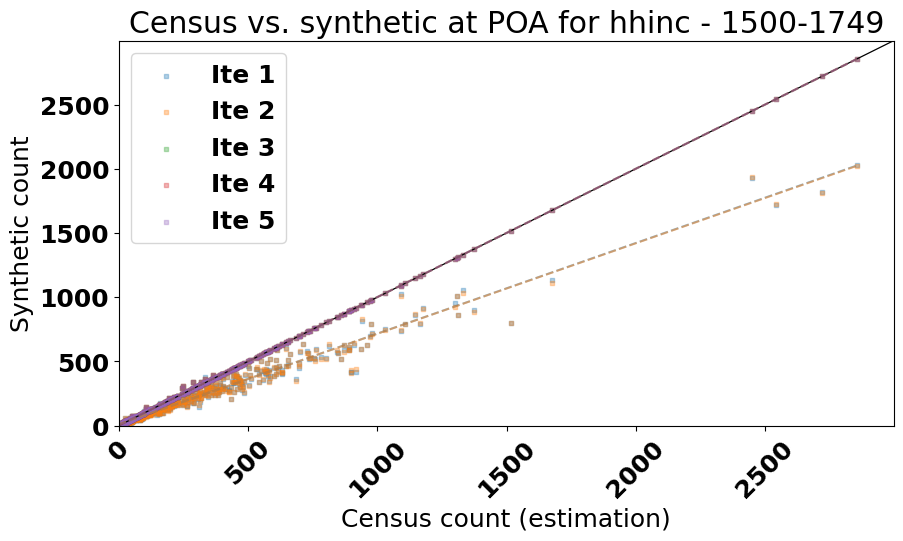

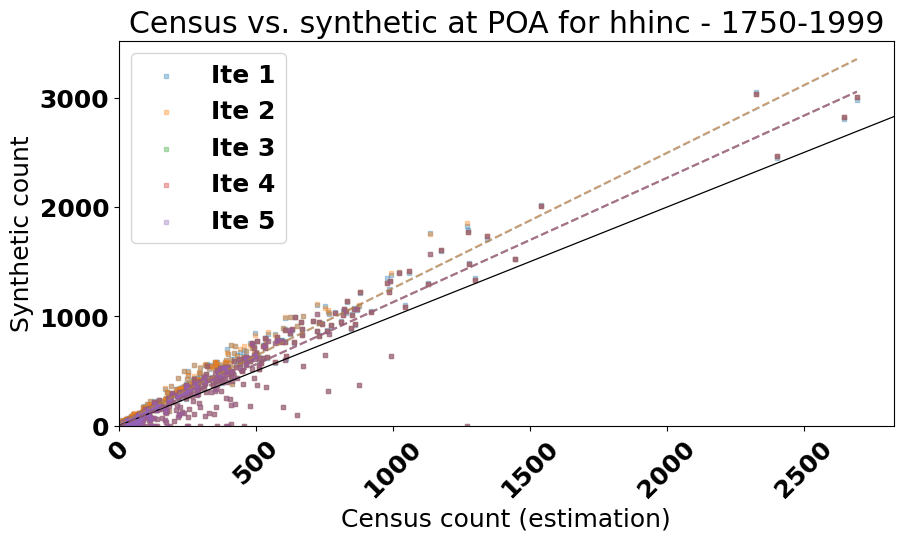

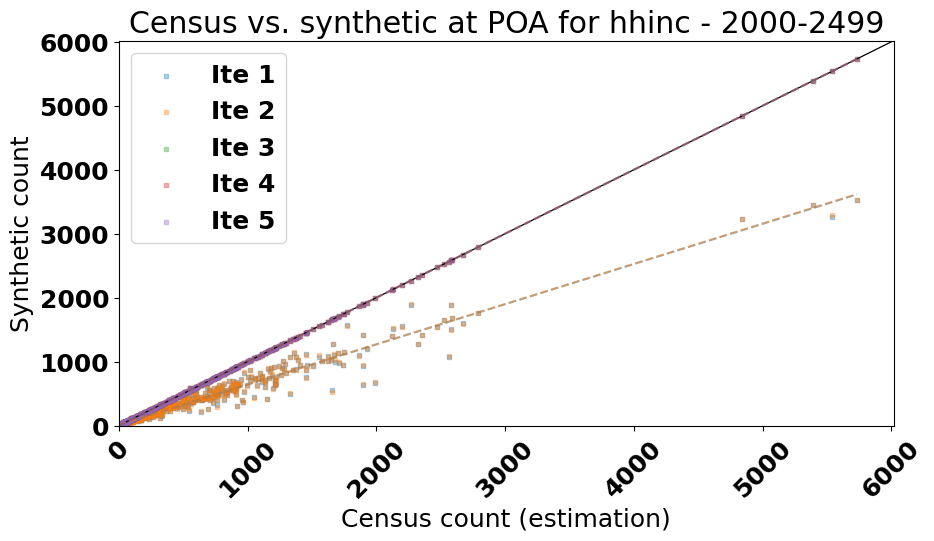

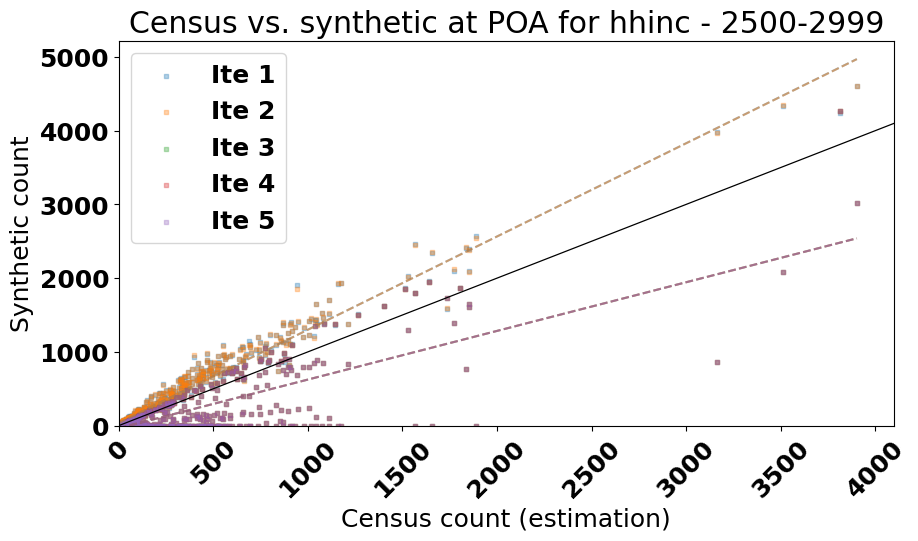

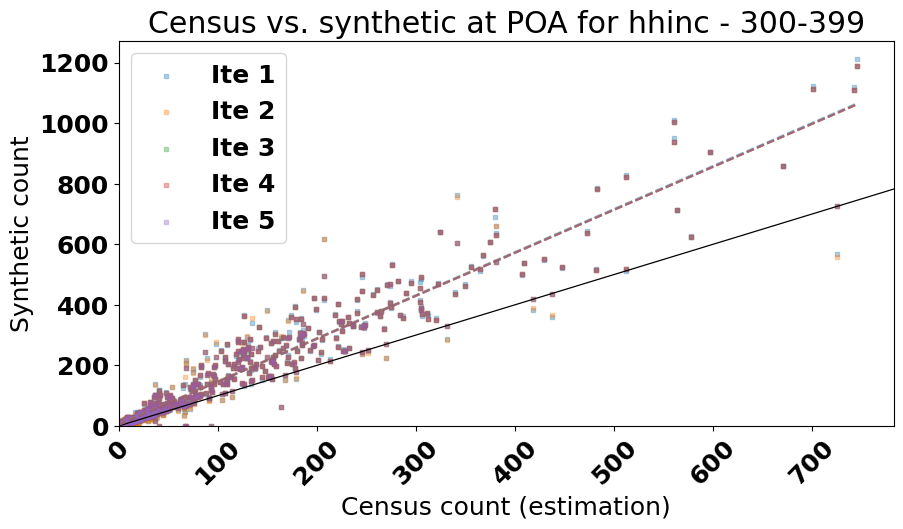

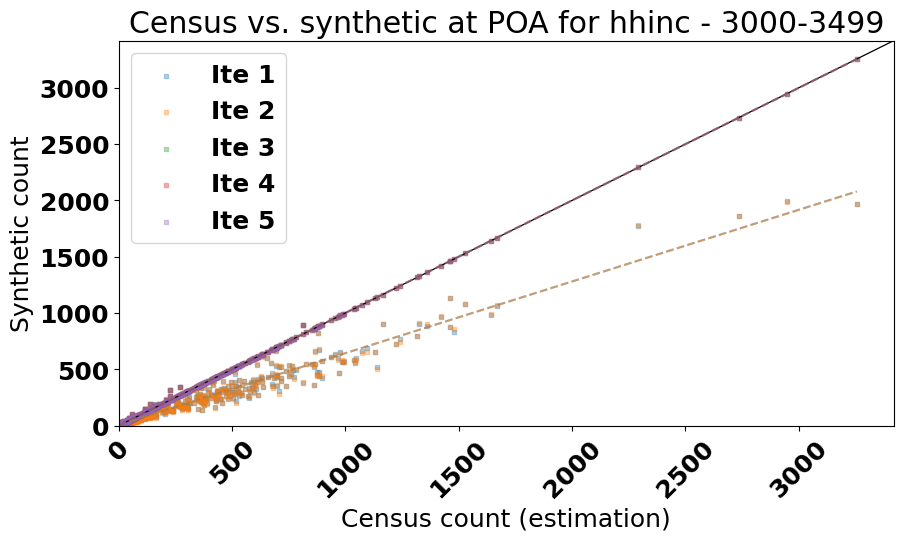

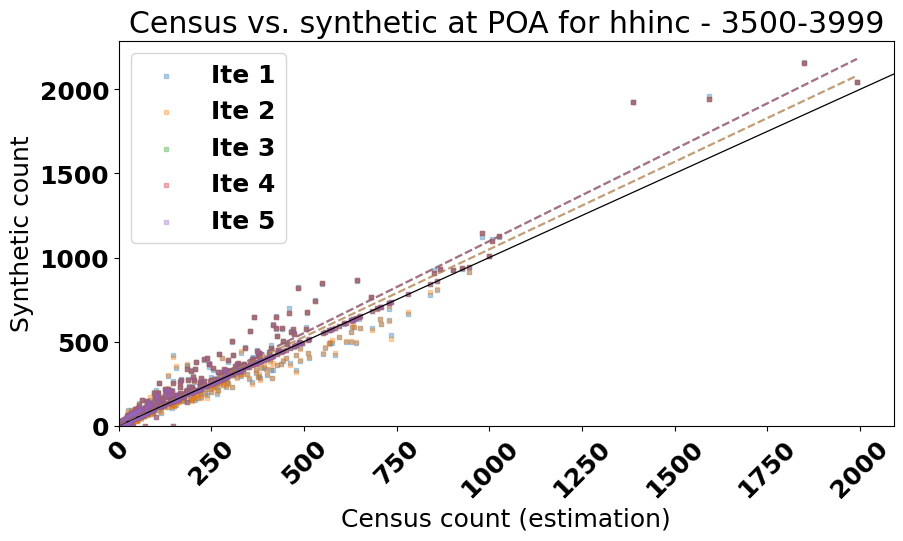

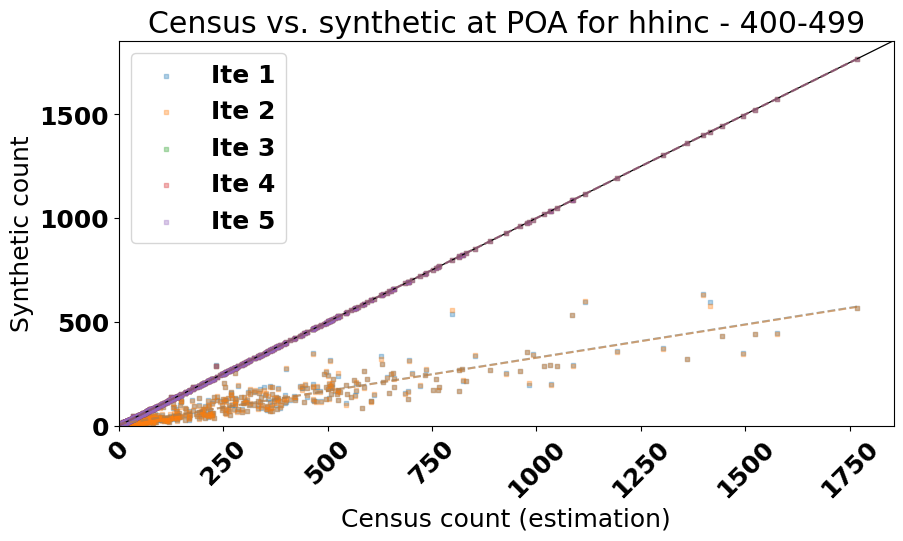

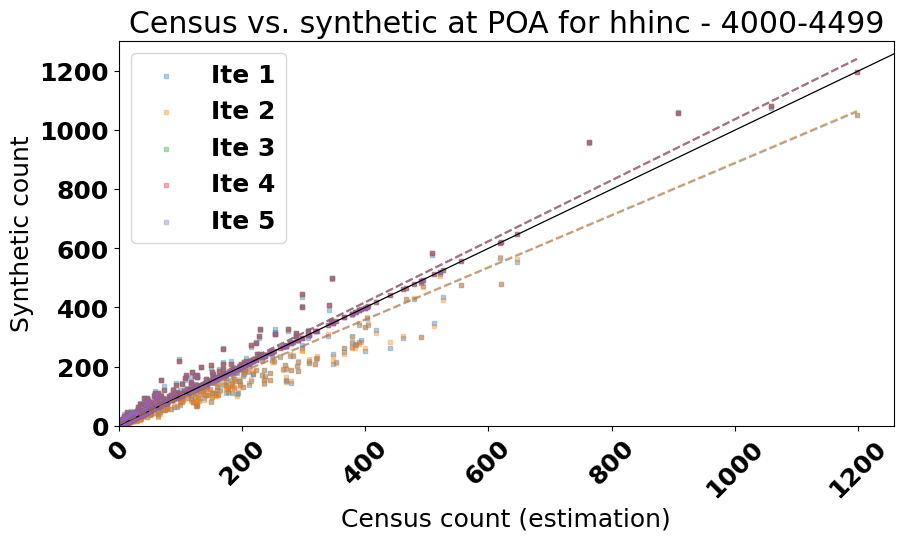

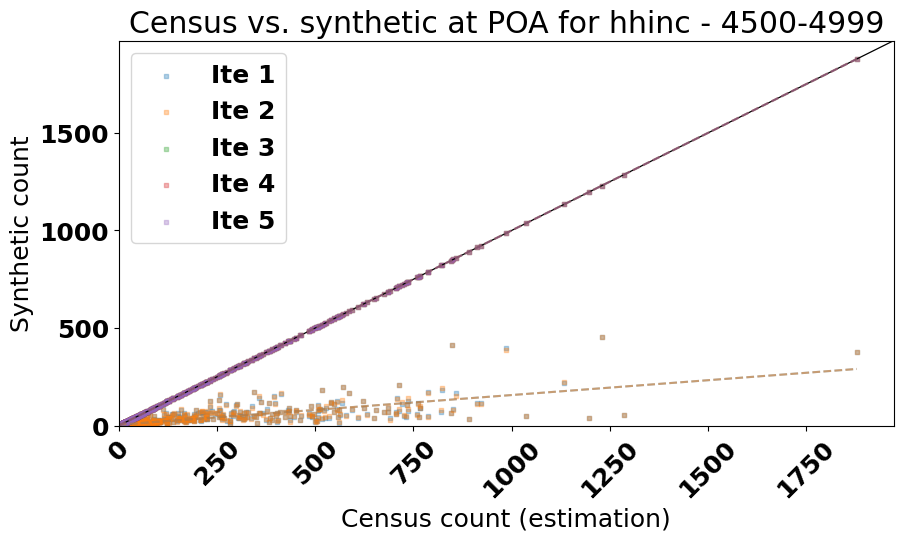

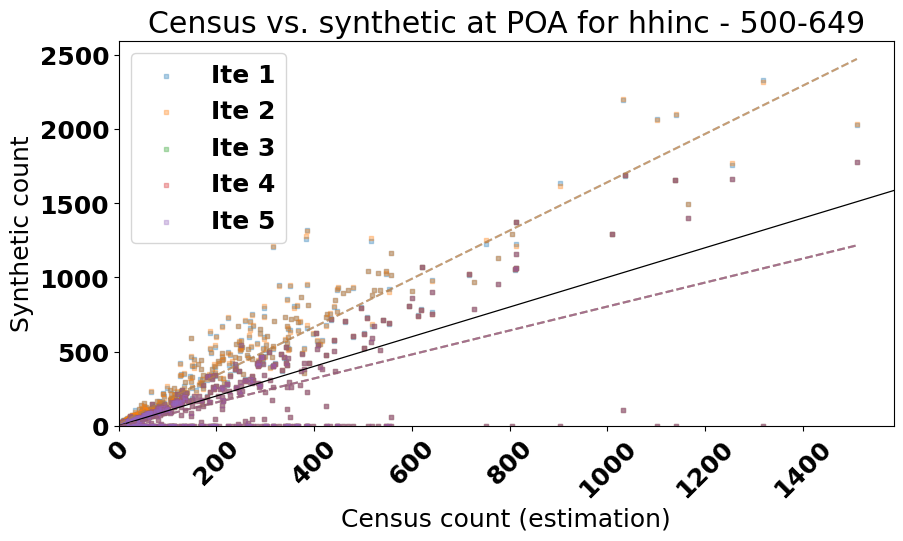

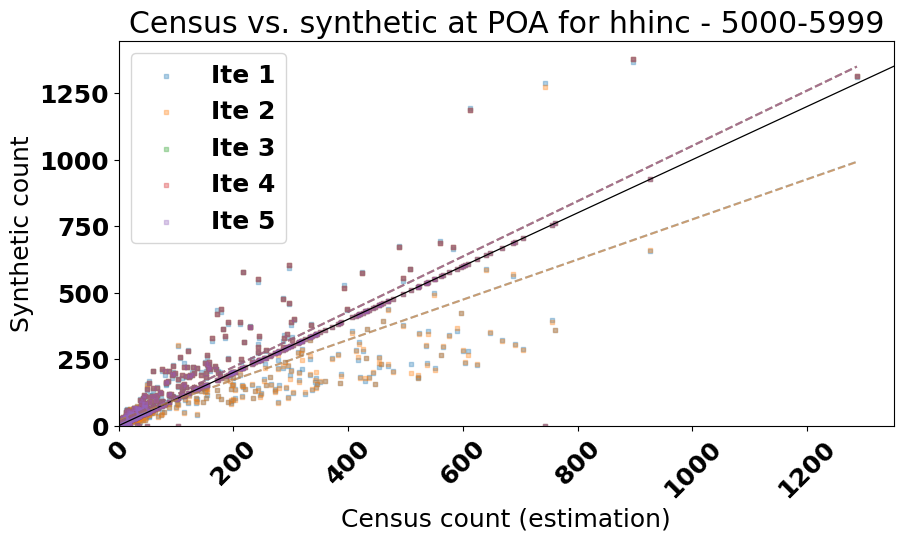

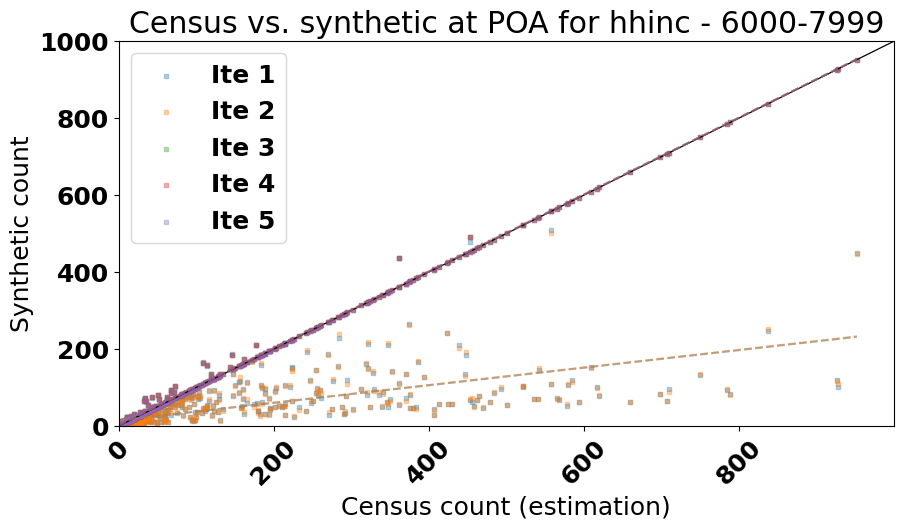

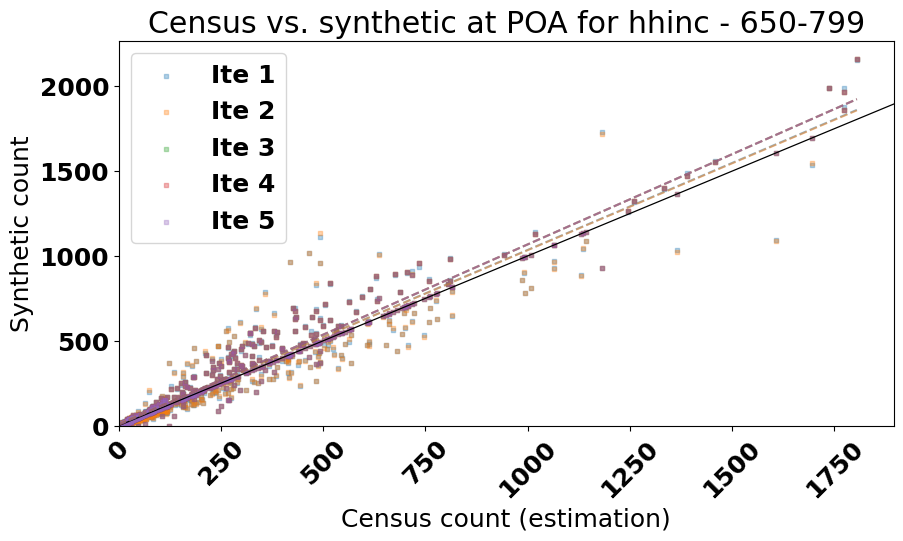

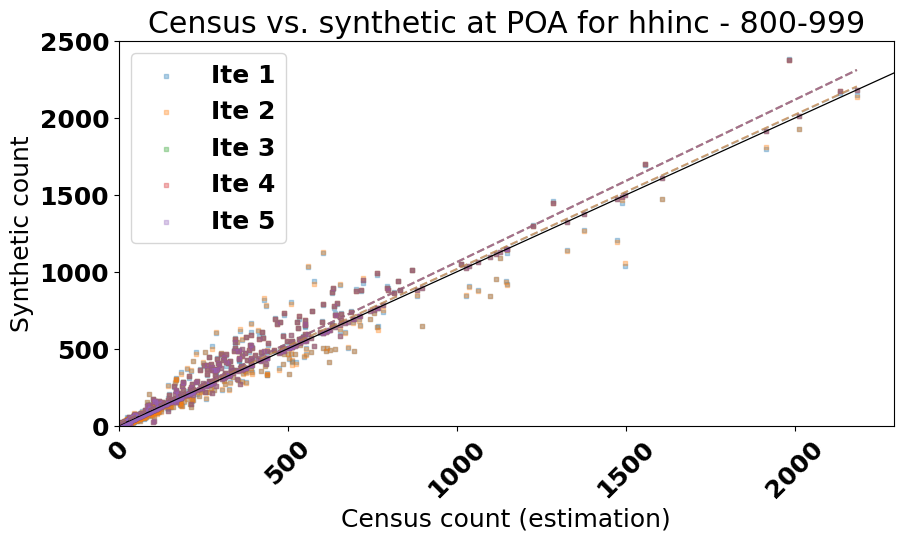

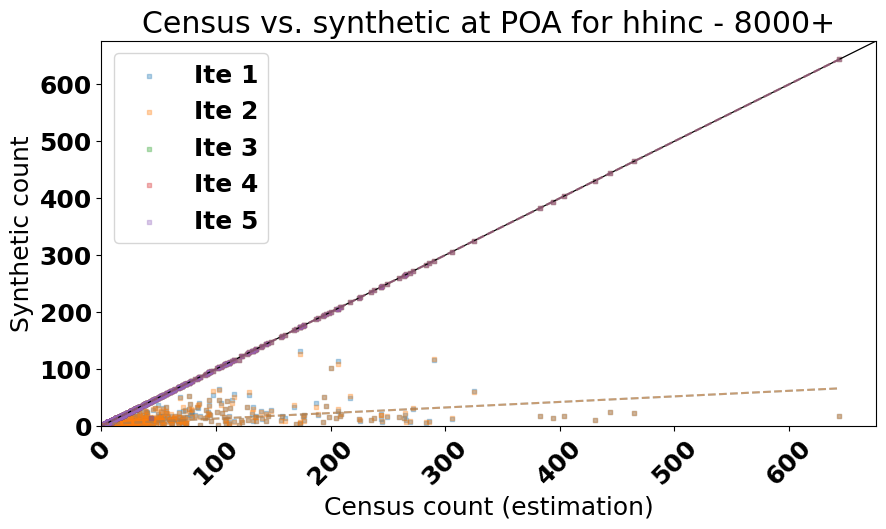

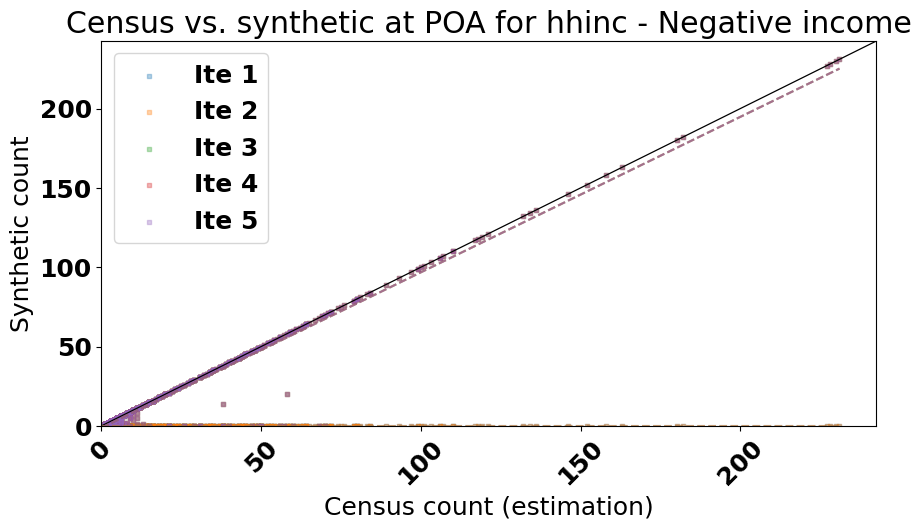

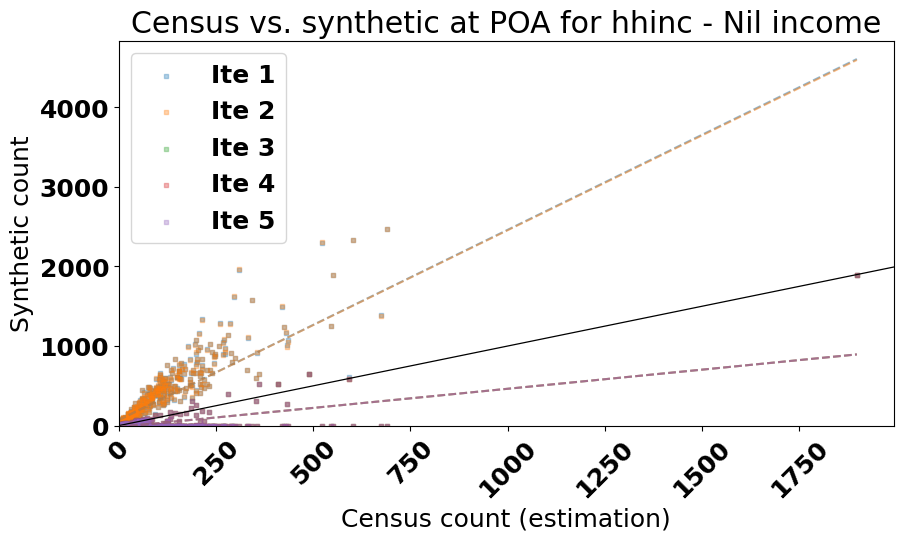

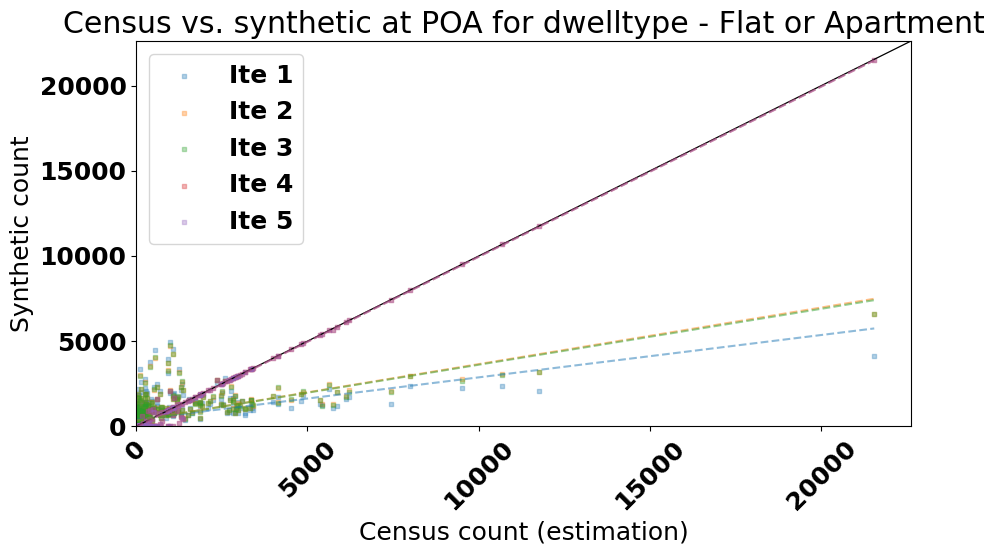

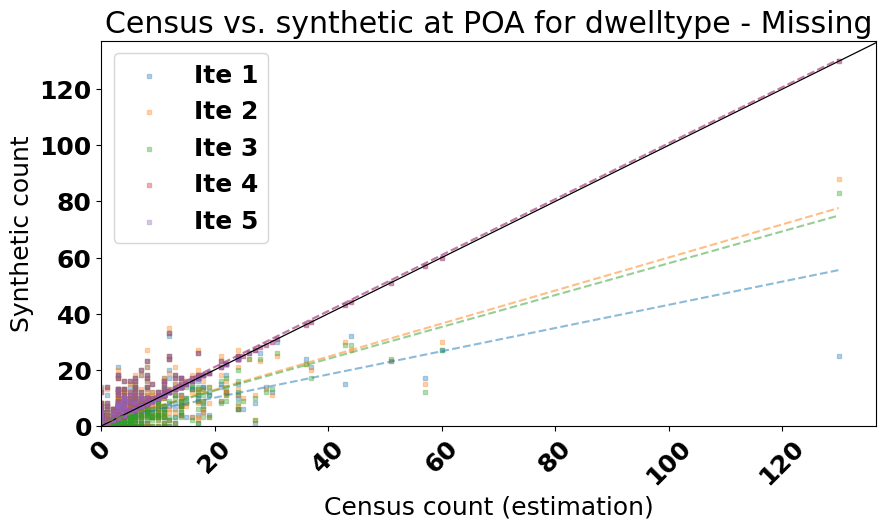

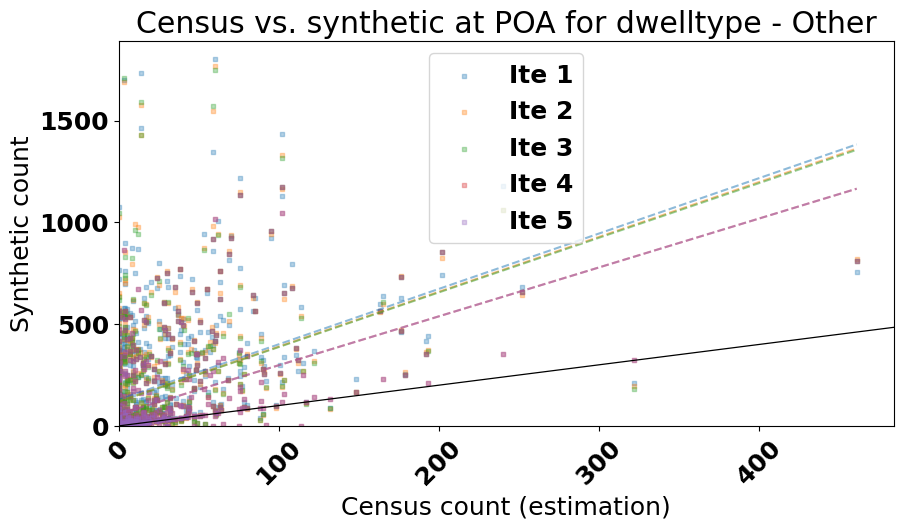

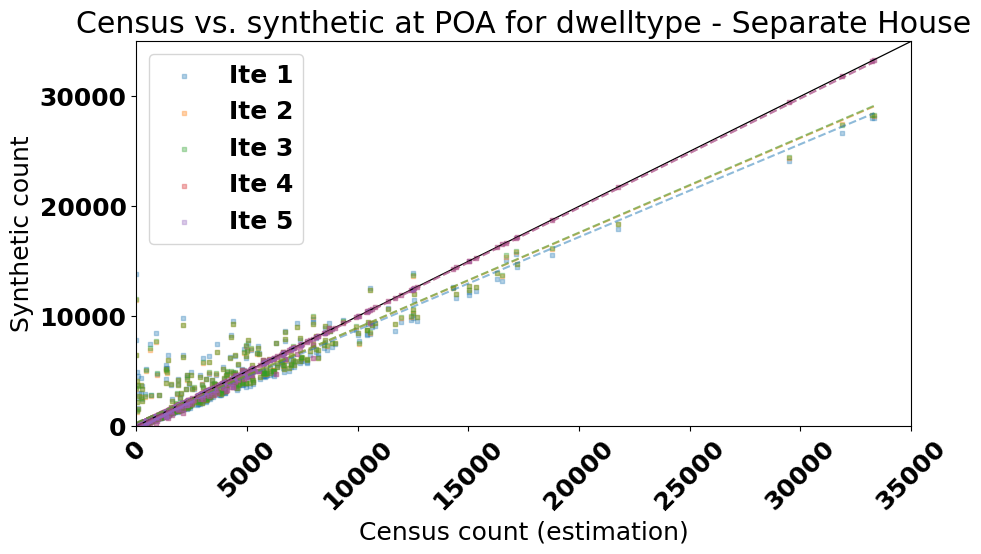

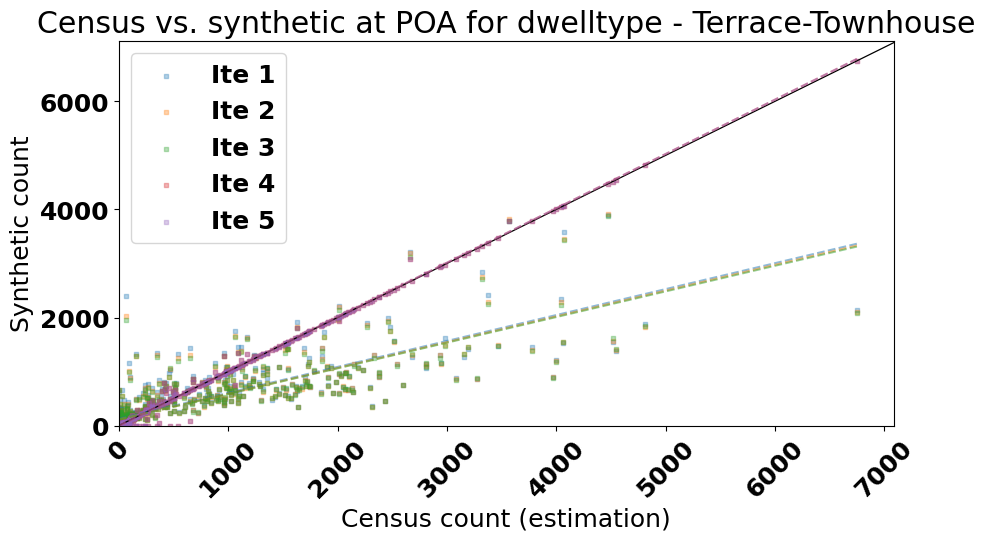

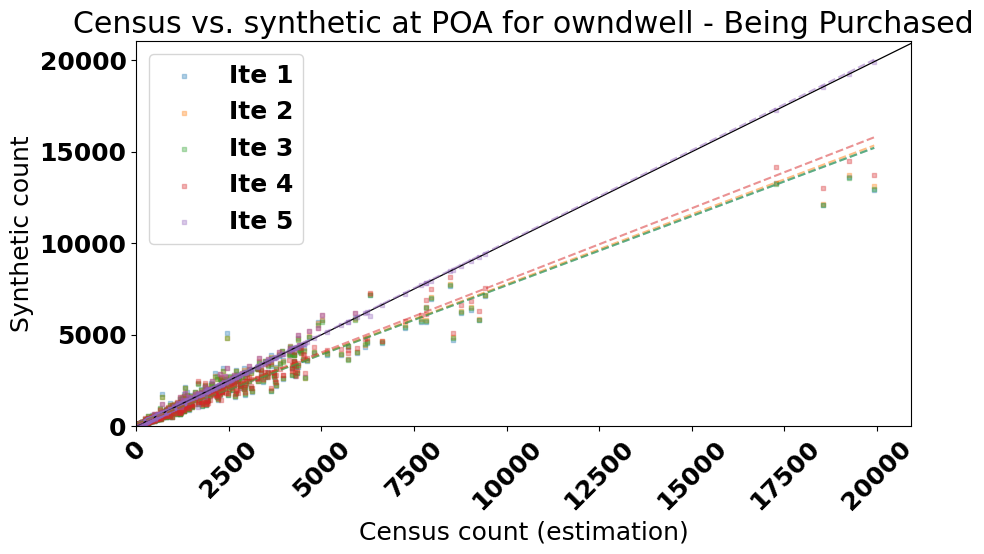

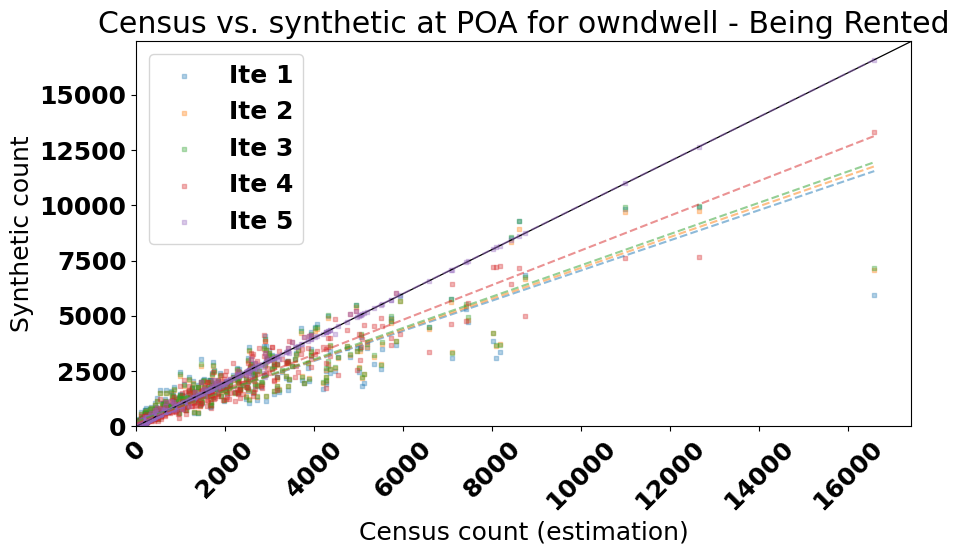

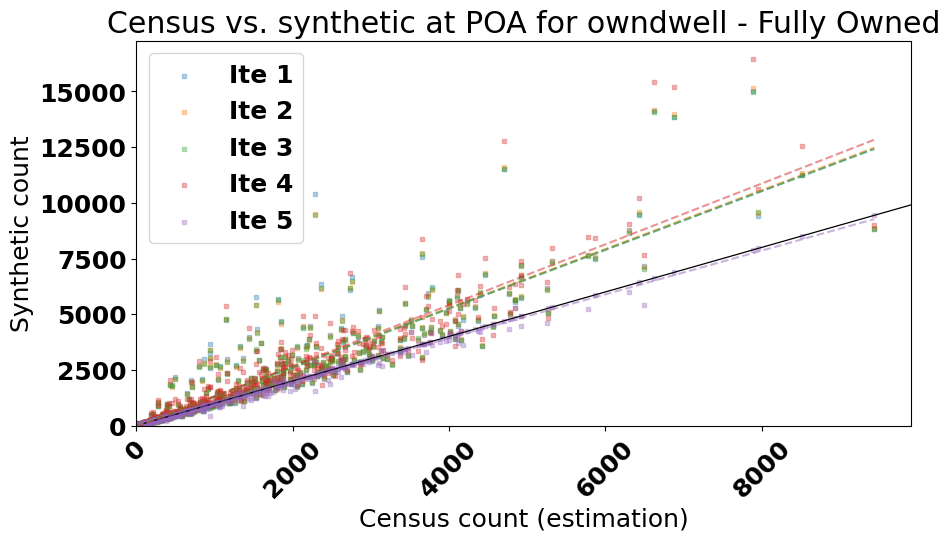

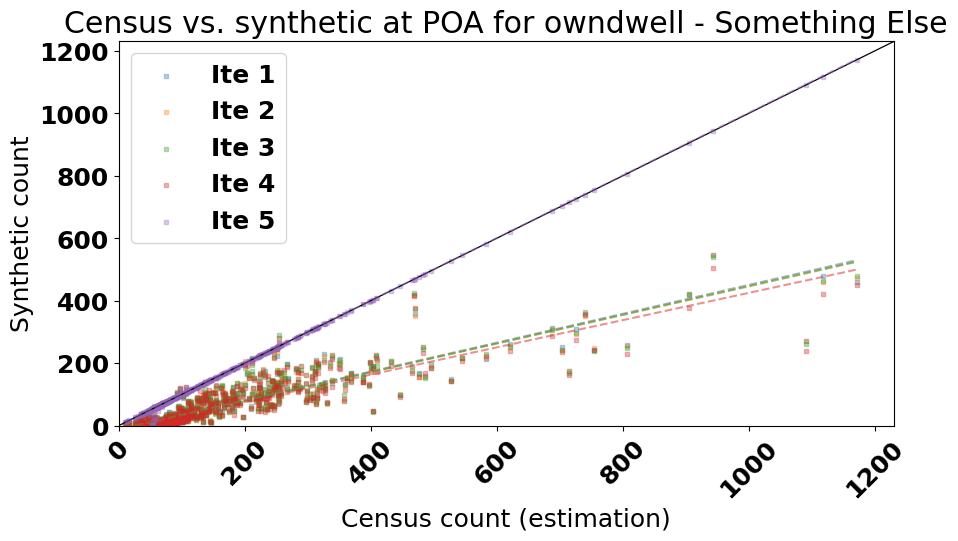

In [18]:
ls_atts = ["hhsize", "totalvehs", "hhinc", "dwelltype", "owndwell"]
for chosen_att in ls_atts:
    if chosen_att in ["sample_geog", "zone_id"]: 
        continue
    ls_syn = [x.groupby(chosen_att)[geo_lev].value_counts() for x in ls_hh_ordered]

    att_df = marg_hh[marg_hh.columns[marg_hh.columns.get_level_values(0)==chosen_att]]
    att_df.index = att_df.index.astype(str)

    to_plot = {}
    for val in att_df.columns.get_level_values(1).unique():
        to_plot[val] = [[], [], [], [], [], []]
        for poa in att_df.index:
            to_plot[val][0].append(att_df.loc[poa][(chosen_att ,val)])
            for i, syn in enumerate(ls_syn):
                if (val, poa) in syn.index:
                    to_plot[val][i+1].append(syn[(val, poa)])
                else:
                    to_plot[val][i+1].append(0)

    for val in att_df.columns.get_level_values(1):
        x = list(to_plot[val][0])

        fig = plt.figure(figsize = (10, 5))
        ax1 = fig.add_subplot(111)
        ax1.axline((0, 0), slope=1, c="black", linewidth=0.9)

        for i, syn in enumerate(ls_syn):
            y = list(to_plot[val][i+1])
            ax1.scatter(x, y, s=10, marker="s", label=f'Ite {i+1}', alpha=0.33)
            y_best_fit= np.poly1d(np.polyfit(x, y, 1))(np.unique(x))
            ax1.plot(np.unique(x), y_best_fit, alpha=0.5, linestyle="--")

        plt.xlabel(f"Census count (estimation)")
        plt.ylabel("Synthetic count")
        val = val.replace("/", "-")
        plt.title(f"Census vs. synthetic at {geo_lev} for {chosen_att} - {val}")
        ax1.set_xlim(left=0)
        ax1.set_ylim(bottom=0)
        plt.xticks(rotation=45)
        plt.legend()
        plt.show()
        # plt.savefig(f"./compa/{chosen_att}_{val}_ites_adjust_compa.png")

In [ ]:
# Now let compare by each SRMSE (bar chart)